<a href="https://colab.research.google.com/github/guilhermecarva/guilhermecarva/blob/main/Aprendizado_por_Reforco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Aprendizado por Reforço (Reinforcement Learning)

Vamos utilizar a representação da matriz de recompensas e aplicar o algoritmo Q-Learning para que o agente aprenda a escapar (de um labirinto).

Treinaremos o agente com poucos episódios e iremos interpretar os resultados a medida que a quantidade de episódios aumenta.

In [ ]:
import pandas as pd
import numpy as np
from pprint import pprint

In [ ]:
#Dados os estados, ações , gamma e objetivo abaixo
states = [0,1,2,3,4,5,6,7]
actions = [0,1,2,3,4,5,6,7]
goal_state = 7
gamma = 0.8

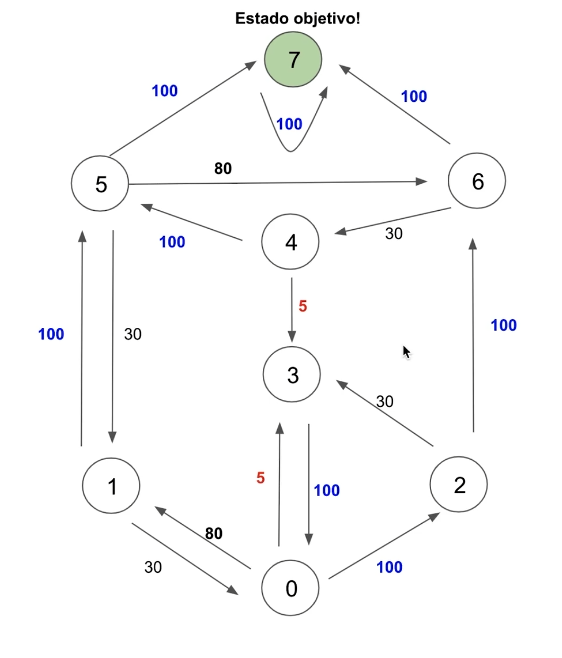

In [ ]:
#Nossa matriz de recompensas
      #0 #1 #2 #3 #4 #5 #6 #7
R = [[-1,80,100,5,-1,-1,-1,-1],  #0
     [30,-1,-1,-1,-1,100,-1,-1], #1
     [-1,-1,-1,30,-1,-1,-1,-1],  #2
     [100,-1,-1,-1,-1,-1,-1,-1], #3
     [-1,-1,-1,5,-1,100,-1,-1],  #4
     [-1,30,-1,-1,-1,-1,80,100], #5
     [-1,-1,-1,-1,30,-1,-1,100], #6
     [-1,-1,-1,-1,-1,-1,-1,100]] #7

R = np.array(R)
print("reward matrix: matriz de recompensas")
pd.DataFrame(R,
             index=['state_'+str(i) for i in range(R.shape[0])],
             columns=['state_'+str(i) for i in range(R.shape[0])])

reward matrix: matriz de recompensas


,state_0,state_1,state_2,state_3,state_4,state_5,state_6,state_7
state_0,-1,80,100,5,-1,-1,-1,-1
state_1,30,-1,-1,-1,-1,100,-1,-1
state_2,-1,-1,-1,30,-1,-1,-1,-1
state_3,100,-1,-1,-1,-1,-1,-1,-1
state_4,-1,-1,-1,5,-1,100,-1,-1
state_5,-1,30,-1,-1,-1,-1,80,100
state_6,-1,-1,-1,-1,30,-1,-1,100
state_7,-1,-1,-1,-1,-1,-1,-1,100


In [ ]:
#inicializando a matriz Q - totalmente zerada
Q = np.zeros(len(states) * len(actions)).reshape(len(states), len(actions))
print("Q-matrix: cérebro do agente, inicializado sem nenhum conhecimento do ambiente\n")
pd.DataFrame(Q,index=['state_'+str(i) for i in range(R.shape[0])],
                     columns=['state_'+str(i) for i in range(R.shape[0])],)

Q-matrix: cérebro do agente, inicializado sem nenhum conhecimento do ambiente



,state_0,state_1,state_2,state_3,state_4,state_5,state_6,state_7
state_0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
state_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
state_2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
state_3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
state_4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
state_5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
state_6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
state_7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#função auxiliar: a partir da matriz R, a função retorna quais são os possíveis estados a partir de um estado fixado
def get_possible_next_states(R, state):
    possible_next_states = np.argwhere(R[state, :]>=0).reshape(-1,)
    return possible_next_states

In [ ]:
#exemplo
get_possible_next_states(R, state = 4)

array([3, 5])

Vamos criar uma rotina para rodar um episódio utilizando um loop while até atingirmos o estado objetivo. O ponto de partida será aleatório.

In [ ]:
state = np.random.choice(states, size = 1)[0]

next_state = None
while next_state != goal_state:

    possible_next_states = get_possible_next_states(R, state) #selecionamos os próximos estados, a partir do estado inicial
    next_state = np.random.choice(possible_next_states, size = 1)[0] #definimos o próximo estado, ou seja, estamos caracterizando qual ação foi tomada
    print('state --> next state:', state, next_state)
    M = Q[next_state, get_possible_next_states(R, next_state)].max() #em cima da ação tomada, atualizamos a matriz Q
    Q[state, next_state] = R[state, next_state] + gamma * M

    state = next_state  #atribuimos o estado inicial ao novo estado
    print()

print('fim do episódio')
print()
print('Q-matrix atualizada:')
pprint(Q)

state --> next state: 6 7

fim do episódio

Q-matrix atualizada:
array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0., 100.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]])


Vamos explorar mais aulguns episódios para verificar a evolução da matriz Q

In [ ]:
state = np.random.choice(states, size = 1)[0]

next_state = None
while next_state != goal_state:

    possible_next_states = get_possible_next_states(R, state)
    next_state = np.random.choice(possible_next_states, size = 1)[0]
    print('state --> next state:', state, next_state)
    M = Q[next_state, get_possible_next_states(R, next_state)].max()
    Q[state, next_state] = R[state, next_state] + gamma * M

    state = next_state
    print()

print('fim do episódio')
print()
print('Q-matrix atualizada:')
pprint(Q)

state --> next state: 0 3

state --> next state: 3 0

state --> next state: 0 3

state --> next state: 3 0

state --> next state: 0 1

state --> next state: 1 0

state --> next state: 0 1

state --> next state: 1 0

state --> next state: 0 3

state --> next state: 3 0

state --> next state: 0 1

state --> next state: 1 5

state --> next state: 5 1

state --> next state: 1 0

state --> next state: 0 3

state --> next state: 3 0

state --> next state: 0 3

state --> next state: 3 0

state --> next state: 0 2

state --> next state: 2 3

state --> next state: 3 0

state --> next state: 0 3

state --> next state: 3 0

state --> next state: 0 1

state --> next state: 1 0

state --> next state: 0 3

state --> next state: 3 0

state --> next state: 0 2

state --> next state: 2 3

state --> next state: 3 0

state --> next state: 0 3

state --> next state: 3 0

state --> next state: 0 1

state --> next state: 1 0

state --> next state: 0 3

state --> next state: 3 0

state --> next state: 0 3

s

In [ ]:
state = np.random.choice(states, size = 1)[0]

next_state = None
while next_state != goal_state:

    possible_next_states = get_possible_next_states(R, state)
    next_state = np.random.choice(possible_next_states, size = 1)[0]
    print('state --> next state:', state, next_state)
    M = Q[next_state, get_possible_next_states(R, next_state)].max()
    Q[state, next_state] = R[state, next_state] + gamma * M

    state = next_state
    print()

print('fim do episódio')
print()
print('Q-matrix atualizada:')
pprint(Q)

state --> next state: 0 2

state --> next state: 2 3

state --> next state: 3 0

state --> next state: 0 1

state --> next state: 1 0

state --> next state: 0 3

state --> next state: 3 0

state --> next state: 0 1

state --> next state: 1 0

state --> next state: 0 1

state --> next state: 1 5

state --> next state: 5 1

state --> next state: 1 5

state --> next state: 5 6

state --> next state: 6 4

state --> next state: 4 5

state --> next state: 5 7

fim do episódio

Q-matrix atualizada:
array([[  0.        , 344.00576545, 375.00900852, 325.00576545,
          0.        ,   0.        ,   0.        ,   0.        ],
       [330.00720682,   0.        ,   0.        ,   0.        ,
          0.        , 335.20461236,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , 349.17013662,
          0.        ,   0.        ,   0.        ,   0.        ],
       [400.00720682,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   

Podemos ver claramente a evolução da matriz Q

##Vamos agora encapsular o algoritmo numa classe para podermos utilizá-lo de forma mais geral!

In [ ]:
class Q_Learning():

    def __init__(self, states, actions, R, goal_state, gamma):
        self.states = states
        self.actions = actions
        self.R = R
        self.goal_state = goal_state
        self.gamma = gamma
        Q = np.zeros(len(states) * len(actions)).reshape(len(states), len(actions))
        self.Q = Q

    def get_Qmatrix(self):
        Qdf = pd.DataFrame(self.Q,
                           index=['state_'+str(i) for i in range(self.Q.shape[0])],
                           columns=['action_'+str(i) for i in range(self.Q.shape[1])]).astype(int)
        return Qdf

    def run_episode(self):
        state = np.random.choice(self.states, size = 1)[0]
        next_state = None
        while next_state != self.goal_state:
            possible_next_states = get_possible_next_states(R, state)
            next_state = np.random.choice(possible_next_states, size = 1)[0]
            M = self.Q[next_state, get_possible_next_states(R, next_state)].max()
            self.Q[state, next_state] = self.R[state, next_state] + self.gamma * M
            state = next_state

    def train_agent(self, num_episodes):
        for e in range(num_episodes):
            self.run_episode()


In [ ]:
#instanciando o agente
agente = Q_Learning(states = states,
                actions = actions,
                R = R,
                goal_state = goal_state,
                gamma = gamma)

In [ ]:
#treinando o agente com 1 episódio
agente.train_agent(num_episodes = 1)
agente.get_Qmatrix()

,action_0,action_1,action_2,action_3,action_4,action_5,action_6,action_7
state_0,0,299,305,280,0,0,0,0
state_1,274,0,0,0,0,196,0,0
state_2,0,0,0,305,0,0,0,0
state_3,344,0,0,0,0,0,0,0
state_4,0,0,0,0,0,0,0,0
state_5,0,120,0,0,0,0,0,100
state_6,0,0,0,0,0,0,0,0
state_7,0,0,0,0,0,0,0,0


In [ ]:
#treinando o agente com alguns episódios
agente.train_agent(num_episodes = 10)
agente.get_Qmatrix()

,action_0,action_1,action_2,action_3,action_4,action_5,action_6,action_7
state_0,0,353,385,331,0,0,0,0
state_1,338,0,0,0,0,343,0,0
state_2,0,0,0,356,0,0,0,0
state_3,408,0,0,0,0,0,0,0
state_4,0,0,0,0,0,196,0,0
state_5,0,304,0,0,0,0,104,244
state_6,0,0,0,0,30,0,0,244
state_7,0,0,0,0,0,0,0,180


In [ ]:
%%time
#treinando o agente com alguns episódios
agente.train_agent(num_episodes = 1000)
agente.get_Qmatrix()

CPU times: user 993 ms, sys: 49.6 ms, total: 1.04 s
Wall time: 1.04 s


,action_0,action_1,action_2,action_3,action_4,action_5,action_6,action_7
state_0,0,479,433,392,0,0,0,0
state_1,413,0,0,0,0,499,0,0
state_2,0,0,0,417,0,0,0,0
state_3,483,0,0,0,0,0,0,0
state_4,0,0,0,392,0,499,0,0
state_5,0,429,0,0,0,0,479,499
state_6,0,0,0,0,429,0,0,499
state_7,0,0,0,0,0,0,0,499


In [ ]:
%%time
#treinando o agente com alguns episódios
agente.train_agent(num_episodes = 5000)
agente.get_Qmatrix()

CPU times: user 6.59 s, sys: 125 ms, total: 6.71 s
Wall time: 8.71 s


,action_0,action_1,action_2,action_3,action_4,action_5,action_6,action_7
state_0,0,480,433,392,0,0,0,0
state_1,414,0,0,0,0,500,0,0
state_2,0,0,0,417,0,0,0,0
state_3,484,0,0,0,0,0,0,0
state_4,0,0,0,392,0,500,0,0
state_5,0,430,0,0,0,0,480,500
state_6,0,0,0,0,430,0,0,500
state_7,0,0,0,0,0,0,0,500


Podemos evidenciar que o agente sabe quais são as melhores ações para se tomar

### Agora vamos criar uma função que recebe a Matriz Q e um estado inicial e retornar o caminho que o agente sugere.

In [ ]:

def melhor_caminho(Q, estado_inicial):
  Q = agente.get_Qmatrix()
  state = np.argmax(Q[estado_inicial:estado_inicial+1])
  L = []
  L = [estado_inicial,state]
  next = None
  while next != goal_state:
    next = np.argmax(Q[state:state+1])
    L.append(next)
    state = next
  return L

In [ ]:
melhor_caminho(Q,3)

[3, 0, 1, 5, 7]

In [ ]:
melhor_caminho(Q,0)

[0, 1, 5, 7]

In [ ]:
melhor_caminho(Q,6)

[6, 7, 7]

In [ ]:
melhor_caminho(Q,2)

[2, 3, 0, 1, 5, 7]

### Comparando os resultado obtidos com o grafo apresentado, observamos que a função está correta e retornando o melhor caminho proposto pelo agente. <br> 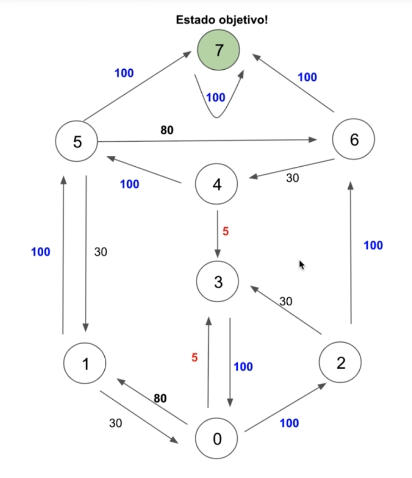